In [26]:
import pandas as pd

In [27]:
archives_by_nfe = pd.read_csv('../output/squared_exponential_rbf_10_hypervolume.csv')
archives_by_nfe

,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5
0,100,0,-44.992592,-0.550813,-0.433861,-0.318733,0.084848,-1.000000
1,100,1,-9.165301,-0.011622,-0.006244,-0.003125,0.406843,-0.964286
2,100,2,-38.199470,-0.379551,-0.224340,-0.176708,0.109889,-1.000000
3,100,3,-19.512778,-0.137170,-0.019027,-0.055622,0.257512,-0.928571
4,100,4,-17.656910,-0.024072,-0.094767,-0.120902,0.200486,-0.892857
...,...,...,...,...,...,...,...,...
71988,100524,706,-35.228195,-0.698614,-0.881978,-0.726520,0.374211,-0.928571
71989,100524,707,-26.216571,-0.976079,-0.839392,-0.914122,0.165258,-0.928571
71990,100524,708,-36.082132,-0.703344,-0.881981,-0.257543,0.366359,-0.964286
71991,100524,709,-43.018408,-0.887182,-0.758576,-0.626255,0.302731,-0.964286


we need to transform the dataframe back into platypus solution instances.

We need to have a collection of solutions for each generation


In [28]:
from platypus import Solution, Problem

n_rbfs = 4
n_objs = 6
n_vars = n_rbfs * 8 

problem = Problem(n_vars, n_objs)

# matters for hypervolume
problem.directions[0] = Problem.MINIMIZE  # hydropower
problem.directions[1] = Problem.MINIMIZE  # atomicpowerplant
problem.directions[2] = Problem.MINIMIZE  # baltimore
problem.directions[3] = Problem.MINIMIZE  # chester
problem.directions[4] = Problem.MAXIMIZE  # environment
problem.directions[5] = Problem.MINIMIZE  # recreation

archives = {}
for nfe, generation in archives_by_nfe.groupby("Unnamed: 0"):
    # we slice from 2, getting rid of the first two columns 
    # which contain the NFE and ID of each solution
    archive = []
    for i, row in generation.iloc[:, 2::].iterrows():
        solution = Solution(problem)
        solution.objectives = row
        archive.append(solution)
    archives[nfe] = archive
        


in this case our reference set is the final set of solutions (only a single seed). So let's load this data as well and turn it into a set of solution in the same way as we did with the archives.

In [29]:
data = pd.read_csv('../output/squared_exponential_rbf_10_solution.csv')

ref_set = []
for i, row in data.iterrows():
    solution = Solution(problem)
    solution.objectives = row
    ref_set.append(solution)


In [30]:
from platypus import Hypervolume

hv = Hypervolume(reference_set=ref_set)

nfes = []
hvs = []
for nfe, archive in archives.items():
    nfes.append(nfe)
    hvs.append(hv.calculate(archive))

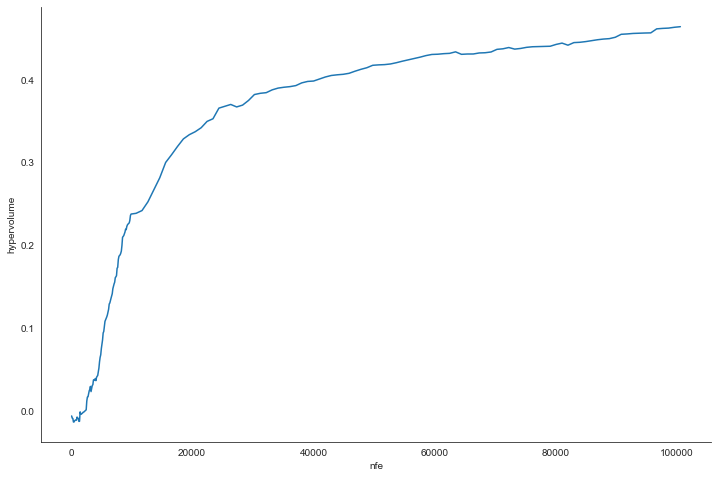

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

fig, ax = plt.subplots()

ax.plot(nfes, hvs)
ax.set_xlabel('nfe')
ax.set_ylabel('hypervolume')

sns.despine()

plt.show()

In [32]:
e_progress = pd.read_csv('../output/squared_exponential_rbf_10_convergence.csv')

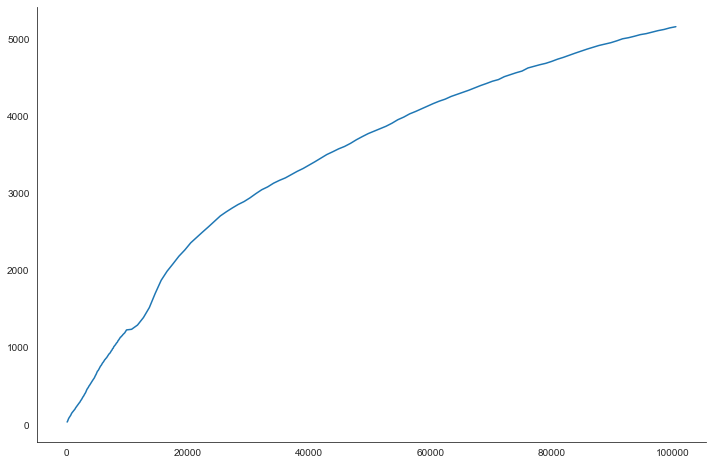

In [33]:
fig, ax = plt.subplots()
ax.plot(e_progress.nfe, e_progress.improvements)

sns.despine()

plt.show()